In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
import json

In [4]:
d = open('shipsnet.json')
data1 = json.load(d)
d.close()

https://www.kaggle.com/tomras/cnn-classifier-using-keras

In [5]:
len(data1['data'])

4000

https://www.kaggle.com/paultimothymooney/identifying-ships-in-satellite-images

In [6]:
len(data1['labels'])

4000

In [7]:
ships = pd.DataFrame(data1)

In [8]:
ships.head()

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007


In [9]:
ships.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       4000 non-null   object
 1   labels     4000 non-null   int64 
 2   locations  4000 non-null   object
 3   scene_ids  4000 non-null   object
dtypes: int64(1), object(3)
memory usage: 125.1+ KB


labels ==1 is the images with Ships and lables ==0 is the number of images without ships

In [10]:
ships[ships['labels']==0]

,data,labels,locations,scene_ids
1000,"[73, 75, 75, 73, 75, 75, 76, 77, 78, 78, 80, 8...",0,"[-122.33459961419122, 37.81140628875495]",20161218_180844_0e26
1001,"[165, 171, 163, 152, 142, 133, 132, 133, 130, ...",0,"[-122.13440135290679, 37.74732085488439]",20170505_181257_0e2f
1002,"[198, 202, 210, 214, 217, 221, 223, 222, 223, ...",0,"[-122.1377855013356, 37.708030696820344]",20170505_181258_0e2f
1003,"[155, 170, 175, 181, 172, 150, 124, 125, 129, ...",0,"[-122.09571903813976, 37.64920246656525]",20170905_181215_0f12
1004,"[74, 80, 80, 81, 81, 81, 82, 81, 83, 84, 80, 8...",0,"[-122.38792956593555, 37.82067246616187]",20170917_190616_0f3c
...,...,...,...,...
3995,"[126, 122, 124, 138, 165, 186, 195, 199, 203, ...",0,"[-122.08693255500694, 37.77781408256089]",20170815_180821_102d
3996,"[130, 134, 139, 128, 117, 126, 141, 147, 142, ...",0,"[-122.10549691828378, 37.76946626247702]",20170730_191230_0f21
3997,"[171, 135, 118, 140, 145, 144, 154, 165, 139, ...",0,"[-122.48298739296371, 37.684929808845375]",20161116_180804_0e14
3998,"[85, 90, 94, 95, 94, 92, 93, 96, 93, 94, 94, 9...",0,"[-122.29028216570079, 37.71632091139081]",20170211_181116_0e16


In [11]:
ships[ships['labels']==1]

,data,labels,locations,scene_ids
0,"[82, 89, 91, 87, 89, 87, 86, 86, 86, 86, 84, 8...",1,"[-118.2254694333423, 33.73803725920789]",20180708_180909_0f47
1,"[76, 75, 67, 62, 68, 72, 73, 73, 68, 69, 69, 6...",1,"[-122.33222866289329, 37.7491755586813]",20170705_180816_103e
2,"[125, 127, 129, 130, 126, 125, 129, 133, 132, ...",1,"[-118.14283073363218, 33.736016066914175]",20180712_211331_0f06
3,"[102, 99, 113, 106, 96, 102, 105, 105, 103, 10...",1,"[-122.34784341495181, 37.76648707436548]",20170609_180756_103a
4,"[78, 76, 74, 78, 79, 79, 79, 82, 86, 85, 83, 8...",1,"[-122.34852408322172, 37.75878462398653]",20170515_180653_1007
...,...,...,...,...
995,"[103, 95, 99, 108, 110, 125, 131, 125, 133, 13...",1,"[-122.34862085843947, 37.767167357603554]",20170921_181406_1031
996,"[75, 75, 75, 75, 74, 70, 69, 72, 73, 72, 70, 6...",1,"[-122.33786604607423, 37.73944613318674]",20170604_180820_0f52
997,"[75, 74, 75, 75, 74, 74, 75, 76, 76, 75, 75, 7...",1,"[-122.33284969739871, 37.71792145705744]",20170721_180825_100b
998,"[49, 50, 49, 45, 49, 53, 52, 46, 43, 44, 49, 5...",1,"[-122.35668820008198, 37.75991104734941]",20170618_180801_0f34


Data from list to np array with uint8

In [12]:
data = np.array(data1['data']).astype('uint8')
labels = np.array(data1['labels']).astype('uint8')


In [13]:
print(data.shape)
print(labels.shape)

(4000, 19200)
(4000,)


## Normalization

https://stats.stackexchange.com/questions/253172/how-should-i-normalise-the-inputs-to-a-neural-network

https://www.kaggle.com/yassineghouzam/introduction-to-cnn-keras-0-997-top-6



We perform a grayscale normalization to reduce the effect of illumination's differences.

Moreover the CNN converg faster on [0..1] data than on [0..255].

In [14]:
data = data /255.0

## Reshape 

https://datascience.stackexchange.com/questions/11704/reshaping-of-data-for-deep-learning-using-keras

https://keras.io/examples/mnist_cnn/

In [15]:
data.shape

(4000, 19200)

https://www.kaggle.com/byrachonok/keras-for-search-ships-in-satellite-image

In [16]:
import keras.backend as K

Using TensorFlow backend.


In [17]:
K.image_data_format()

'channels_last'

In [18]:
n_spectrum = 3 # color chanel (RGB)
weight = 80
height = 80
X = data.reshape([-1, n_spectrum,weight, height]).transpose([0,2,3,1])
X[0].shape



(80, 80, 3)

flip each x[i] from [layer][row][col] to [row][col][layer]

https://www.kaggle.com/jakelow/finding-ships-in-satellite-images

In [19]:
X.shape

(4000, 80, 80, 3)

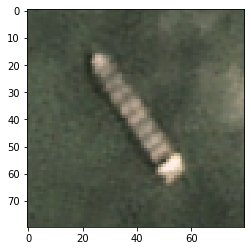

In [20]:
plt.imshow(X[1])

In [21]:
X[1].shape

(80, 80, 3)

In [22]:
from keras.utils.np_utils import to_categorical

In [23]:
y= to_categorical(labels,num_classes=2)


In [24]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [27]:
X[labels==1].shape

(1000, 80, 80, 3)

In [31]:
X[labels==0].shape

(3000, 80, 80, 3)

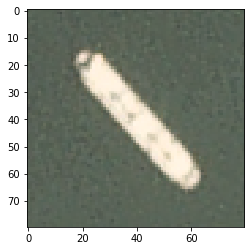

In [28]:
plt.imshow(X[labels==1][0])
plt.title('With ship')

Text(0.5, 1.0, 'Without ship')

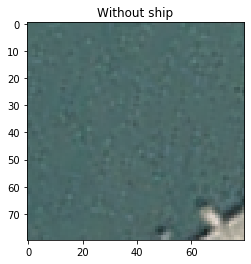

In [30]:
plt.imshow(X[labels==0][0])
plt.title('Without ship')

## train test split


In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1)

In [34]:
X_train.shape

(3600, 80, 80, 3)

In [35]:
X_test.shape

(400, 80, 80, 3)

## Model

In [36]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [43]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu',input_shape=(80,80,3)))
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))


In [44]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [45]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 3600 samples, validate on 400 samples
Epoch 1/1
3600/3600 [==============================] - 48s 13ms/step - loss: 1.3283 - accuracy: 0.7683 - val_loss: 0.4119 - val_accuracy: 0.8325
Test loss: 0.41189538955688476
Test accuracy: 0.8324999809265137


## Adding more layers

The number of filters is increased to increase the depth of the feature space thus helping in learning more levels of global abstract structures. 

By convention the number of channels generally increase or stay the same while we progress through layers in our convolutional neural net architecture

In [46]:
K.clear_session()
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu',input_shape=(80,80,3)))
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
          
model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(2,activation='softmax'))


In [47]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [48]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=1,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 3600 samples, validate on 400 samples
Epoch 1/1
3600/3600 [==============================] - 73s 20ms/step - loss: 0.7819 - accuracy: 0.7542 - val_loss: 0.2590 - val_accuracy: 0.9000
Test loss: 0.25895803451538085
Test accuracy: 0.8999999761581421


## Dropout

In [49]:
from keras.layers import Dropout

In [50]:
K.clear_session()
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu',input_shape=(80,80,3)))
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25)) 

model.add(Dense(2,activation='softmax'))


In [51]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [52]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(X_test, y_test))
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 3600 samples, validate on 400 samples
Epoch 1/10
3600/3600 [==============================] - 79s 22ms/step - loss: 0.7218 - accuracy: 0.7503 - val_loss: 0.5495 - val_accuracy: 0.8725
Epoch 2/10
3600/3600 [==============================] - 80s 22ms/step - loss: 0.4007 - accuracy: 0.8453 - val_loss: 0.3062 - val_accuracy: 0.8575
Epoch 3/10
3600/3600 [==============================] - 79s 22ms/step - loss: 0.2941 - accuracy: 0.8864 - val_loss: 0.2738 - val_accuracy: 0.8850
Epoch 4/10
3600/3600 [==============================] - 78s 22ms/step - loss: 0.2468 - accuracy: 0.9003 - val_loss: 0.1909 - val_accuracy: 0.9200
Epoch 5/10
3600/3600 [==============================] - 78s 22ms/step - loss: 0.2347 - accuracy: 0.9053 - val_loss: 0.1821 - val_accuracy: 0.9150
Epoch 6/10
3600/3600 [==============================] - 79s 22ms/step - loss: 0.1761 - accuracy: 0.9289 - val_loss: 0.2231 - val_accuracy: 0.9350
Epoch 7/10
3600/3600 [==============================] - 77s 21ms/step - loss:

In [53]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.32772827029228213
Test accuracy: 0.9049999713897705


In [54]:
model_vals = pd.DataFrame(model.history.history)

In [55]:
model_vals

,val_loss,val_accuracy,loss,accuracy
0,0.549470,0.8725,0.721756,0.750278
1,0.306165,0.8575,0.400733,0.845278
2,0.273838,0.8850,0.294138,0.886389
3,0.190917,0.9200,0.246834,0.900278
4,0.182063,0.9150,0.234706,0.905278
5,0.223117,0.9350,0.176115,0.928889
6,0.509082,0.9050,0.166847,0.941111
7,0.173486,0.9500,0.144774,0.946944
8,0.120765,0.9550,0.109590,0.960833
9,0.327728,0.9050,0.077362,0.967778


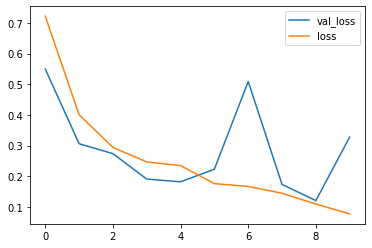

In [56]:
plt.plot(model_vals['val_loss'],label='val_loss')
plt.plot(model_vals['loss'],label='loss')
plt.legend()

## Early stopping

In [60]:
from keras.callbacks import EarlyStopping

In [63]:
K.clear_session()
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu',input_shape=(80,80,3)))
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25)) 

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25)) 

model.add(Dense(2,activation='softmax'))


In [64]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [65]:
early_stop = EarlyStopping(monitor='val_loss',mode ='min',verbose=1,patience=25)

In [66]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=20,
          verbose=1,
          validation_data=(X_test, y_test), callbacks=[early_stop])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 3600 samples, validate on 400 samples
Epoch 1/20
3600/3600 [==============================] - 82s 23ms/step - loss: 0.7084 - accuracy: 0.7519 - val_loss: 0.7025 - val_accuracy: 0.7975
Epoch 2/20
3600/3600 [==============================] - 75s 21ms/step - loss: 0.4426 - accuracy: 0.8328 - val_loss: 0.2719 - val_accuracy: 0.8800
Epoch 3/20
3600/3600 [==============================] - 85s 24ms/step - loss: 0.3639 - accuracy: 0.8639 - val_loss: 0.2514 - val_accuracy: 0.9025
Epoch 4/20
3600/3600 [==============================] - 85s 24ms/step - loss: 0.2572 - accuracy: 0.8939 - val_loss: 0.2262 - val_accuracy: 0.9125
Epoch 5/20
3600/3600 [==============================] - 84s 23ms/step - loss: 0.2281 - accuracy: 0.9031 - val_loss: 0.2232 - val_accuracy: 0.8900
Epoch 6/20
3600/3600 [==============================] - 85s 24ms/step - loss: 0.1878 - accuracy: 0.9242 - val_loss: 0.2838 - val_accuracy: 0.9150
Epoch 7/20
3600/3600 [==============================] - 80s 22ms/step - loss:

In [67]:
model_vals = pd.DataFrame(model.history.history)

In [68]:
model_vals


,val_loss,val_accuracy,loss,accuracy
0,0.702525,0.7975,0.708371,0.751944
1,0.271880,0.8800,0.442577,0.832778
2,0.251432,0.9025,0.363904,0.863889
3,0.226151,0.9125,0.257199,0.893889
4,0.223226,0.8900,0.228143,0.903056
5,0.283814,0.9150,0.187786,0.924167
6,0.124523,0.9575,0.156978,0.941389
7,0.136242,0.9625,0.111156,0.959722
8,0.171369,0.9525,0.094879,0.966944
9,0.360955,0.8900,0.073873,0.975556


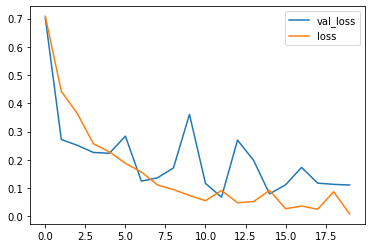

In [69]:
plt.plot(model_vals['val_loss'],label='val_loss')
plt.plot(model_vals['loss'],label='loss')
plt.legend()

## Batch normalization

In [107]:
from keras.layers import BatchNormalization



In [70]:
## Batch normalization

from keras.layers import BatchNormalization



K.clear_session()
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu',input_shape=(80,80,3)))
model.add(Conv2D(filters = 32, kernel_size= (3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())
model.add(Dropout(0.25)) 

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25)) 

model.add(Dense(2,activation='softmax'))


In [71]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [72]:
early_stop = EarlyStopping(monitor='val_loss',mode ='min',verbose=1,patience=25)

In [73]:
model.fit(X_train, y_train,
          batch_size=128,
          epochs=15,
          verbose=1,
          validation_data=(X_test, y_test), callbacks=[early_stop])
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 3600 samples, validate on 400 samples
Epoch 1/15
3600/3600 [==============================] - 93s 26ms/step - loss: 0.4758 - accuracy: 0.8356 - val_loss: 0.4645 - val_accuracy: 0.7575
Epoch 2/15
3600/3600 [==============================] - 87s 24ms/step - loss: 0.1919 - accuracy: 0.9328 - val_loss: 0.7854 - val_accuracy: 0.7325
Epoch 3/15
3600/3600 [==============================] - 86s 24ms/step - loss: 0.1189 - accuracy: 0.9617 - val_loss: 0.5756 - val_accuracy: 0.7325
Epoch 4/15
3600/3600 [==============================] - 88s 24ms/step - loss: 0.0738 - accuracy: 0.9781 - val_loss: 0.7927 - val_accuracy: 0.7325
Epoch 5/15
3600/3600 [==============================] - 90s 25ms/step - loss: 0.0386 - accuracy: 0.9908 - val_loss: 0.9146 - val_accuracy: 0.7325
Epoch 6/15
3600/3600 [==============================] - 88s 24ms/step - loss: 0.0240 - accuracy: 0.9922 - val_loss: 1.5599 - val_accuracy: 0.7325
Epoch 7/15
3600/3600 [==============================] - 86s 24ms/step - loss:

In [74]:
model_vals = pd.DataFrame(model.history.history)

In [75]:
model_vals

,val_loss,val_accuracy,loss,accuracy
0,0.464492,0.7575,0.475780,0.835556
1,0.785443,0.7325,0.191910,0.932778
2,0.575634,0.7325,0.118921,0.961667
3,0.792729,0.7325,0.073788,0.978056
4,0.914583,0.7325,0.038565,0.990833
5,1.559872,0.7325,0.023999,0.992222
6,0.300116,0.8450,0.034637,0.987222
7,0.800269,0.7400,0.019437,0.993611
8,1.120854,0.7425,0.035768,0.989167
9,0.815890,0.7500,0.011489,0.996667


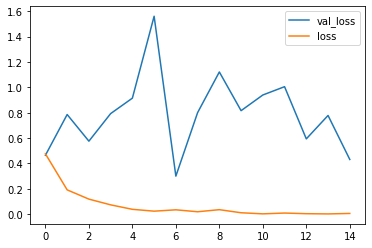

In [76]:
plt.plot(model_vals['val_loss'],label='val_loss')
plt.plot(model_vals['loss'],label='loss')
plt.legend()